In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
import platform
if platform.system() == "Windows":
    plt.rcParams['font.family'] = ['Times new roman',] # windows->Heiti TC
else:
    plt.rcParams['font.family'] = ['Heiti TC',] # windows->Heiti TC
    
plt.rcParams['axes.unicode_minus'] = False # windows->simhei
plt.rcParams['figure.dpi'] = 200

import geopandas as gpd
import shapely
from shapely.geometry import Point,Polygon,LineString,MultiLineString,MultiPoint,MultiPolygon

import pickle
from tqdm import tqdm
from glob import glob
import joblib

import seaborn as sns

In [2]:
import os

import platform
if platform.system() == "Windows":
    os.chdir(r'H:\BaiduSyncdisk\DR.MENG-Full\Y2024-002-DT-NANJING-ACCESSIBILITY-MAUP')
else:
    os.chdir(r'/Volumes/SANDISK/DR.MENG')

# read data

In [3]:
od_cycle = pd.read_csv('./od_crawled_data_buildings/cycle_od_nanjing.csv')
od_nav = pd.read_csv('./od_crawled_data_buildings/Nanjing_maup_building_osm_path_car.csv') 
od_pt = pd.read_csv('./od_crawled_data_buildings/pt_od_nanjing.csv')
od_walk = pd.read_csv('./od_crawled_data_buildings/walk_od_nanjing.csv')

In [4]:
len(od_cycle),len(od_nav),len(od_pt),len(od_walk)

(16586048, 26250187, 26088183, 10276169)

In [5]:
sum([len(od_cycle),len(od_nav),len(od_pt),len(od_walk)])

79200587

In [6]:
od_cycle.head(1)

,_id,distance,duration,od_id
0,6662bac0126da7690b51f100,4059,1230,od_14928012


In [7]:
od_nav.head(1)

,duration,distance,od_id
0,1506.75,5828.1,od_44


In [8]:
od_pt.head(1)

,all_distance,all_time,all_price,all_walk_distance,all_walk_time,access_walk_distance,egress_walk_distance,number_of_boardings,od_id,pt
0,28902,7564,5.0,883.0,735.0,623.0,260.0,2.0,od_13059750,1


In [9]:
od_walk.head(1)

,_id,all_distance,all_time,od_id
0,665939503348c340b4aea238,5711,4895,od_8221176


In [10]:
od_walk.rename(columns={'all_distance':'distance', 'all_time':'duration'}, inplace=True)
od_pt.rename(columns={'all_distance':'distance', 'all_time':'duration'}, inplace=True)

In [11]:
od_walk.head(1)

,_id,distance,duration,od_id
0,665939503348c340b4aea238,5711,4895,od_8221176


In [12]:
od_pt.head(1)

,distance,duration,all_price,all_walk_distance,all_walk_time,access_walk_distance,egress_walk_distance,number_of_boardings,od_id,pt
0,28902,7564,5.0,883.0,735.0,623.0,260.0,2.0,od_13059750,1


# merge data

In [13]:
od_pt = od_pt[['od_id','distance','duration']]
od_walk = od_walk[['od_id','distance','duration']]
od_nav = od_nav[['od_id','distance','duration']]
od_cycle = od_cycle[['od_id','distance','duration']]

In [14]:
od_pt.head(1)

,od_id,distance,duration
0,od_13059750,28902,7564


In [15]:
od_nav.head(1)

,od_id,distance,duration
0,od_44,5828.1,1506.75


In [16]:
od_pt.head(1)

,od_id,distance,duration
0,od_13059750,28902,7564


In [17]:
od_walk.head(1)

,od_id,distance,duration
0,od_8221176,5711,4895


In [18]:
dt_full_od = pd.read_csv('./od_request_data_buildings/data_od_parse.csv') 
dt_5km_od = pd.read_csv('./od_request_data_buildings/data_od_parse_walk_5km.csv')
dt_7km_od = pd.read_csv('./od_request_data_buildings/data_od_parse_walk_7km.csv') 

In [19]:
len(dt_full_od),len(dt_5km_od),len(dt_7km_od)

(26119495, 10276469, 16586677)

In [20]:
od_cycle.head(1)

,od_id,distance,duration
0,od_14928012,4059,1230


In [21]:
dt_7km_od.head(1)

,building_id,x_res,y_res,name,park_id,x_parks,y_parks,od_id
0,b_0,118.729455,31.994567,乌龙潭公园,p_1,118.762604,32.049716,od_0


In [22]:
od_cycle = od_cycle.merge(dt_7km_od, on='od_id')
od_nav = od_nav.merge(dt_full_od, on='od_id')
od_pt = od_pt.merge(dt_full_od, on='od_id')
od_walk = od_walk.merge(dt_5km_od, on='od_id')

In [23]:
od_cycle.head(1)

,od_id,distance,duration,building_id,x_res,y_res,name,park_id,x_parks,y_parks
0,od_14928012,4059,1230,b_6170,118.797391,32.048642,玄武湖公园,p_101,118.807986,32.071832


In [24]:
od_nav.head(1)

,od_id,distance,duration,building_id,x_res,y_res,name,park_id,x_parks,y_parks
0,od_44,5828.1,1506.75,b_83,118.776525,32.069436,宝船厂遗址公园,p_0,118.73099,32.063972


In [25]:
od_pt.head(1)

,od_id,distance,duration,building_id,x_res,y_res,name,park_id,x_parks,y_parks
0,od_13059750,28902,7564,b_130122,118.760046,32.079825,青奥体育公园,p_129,118.661224,32.046303


In [26]:
od_walk.head(1)

,od_id,distance,duration,building_id,x_res,y_res,name,park_id,x_parks,y_parks
0,od_8221176,5711,4895,b_130167,118.759773,32.079866,朝天宫公园,p_132,118.768702,32.035746


## normal duration from second to minute

In [27]:
od_cycle['duration'] = od_cycle['duration'] / 60 # seconds to mins
# od_cycle['distance'] = od_cycle['duration'] / 1000 # m to km

od_nav['duration'] = od_nav['duration'] / 60
# od_nav['distance'] = od_nav['distance'] / 1000


od_pt['duration'] = od_pt['duration'] / 60
# od_pt['distance'] = od_pt['all_distance'] / 1000

od_walk['duration'] = od_walk['duration'] / 60
# od_walk['distance'] = od_walk['all_distance'] / 1000

In [28]:
od_walk.head(1)

,od_id,distance,duration,building_id,x_res,y_res,name,park_id,x_parks,y_parks
0,od_8221176,5711,81.583333,b_130167,118.759773,32.079866,朝天宫公园,p_132,118.768702,32.035746


In [29]:
# od_walk.to_csv()
# od_nav.to_csv()
# od_pt.to_csv()
# od_walk.to_csv()

# duration and distance statistic

In [30]:
len(od_cycle)

16586048

In [31]:
od_cycle_nearest_parks = od_cycle.sort_values(by=['building_id', 'duration']).drop_duplicates(subset='building_id',keep='first') # nearest park

In [32]:
od_cycle_nearest_parks.head(1)

,od_id,distance,duration,building_id,x_res,y_res,name,park_id,x_parks,y_parks
15781064,od_2450690,1181,5.95,b_0,118.729455,31.994567,河西中央公园,p_99,118.72059,31.997267


In [33]:
len(od_cycle_nearest_parks)

139778

In [34]:
od_cycle_nearest_parks

,od_id,distance,duration,building_id,x_res,y_res,name,park_id,x_parks,y_parks
15781064,od_2450690,1181,5.950000,b_0,118.729455,31.994567,河西中央公园,p_99,118.720590,31.997267
15781137,od_2450694,894,4.500000,b_1,118.727563,31.995401,河西中央公园,p_99,118.720590,31.997267
15781857,od_2450730,1222,6.166667,b_10,118.729188,31.996019,河西中央公园,p_99,118.720590,31.997267
12316418,od_13883501,1547,7.800000,b_100,118.776299,32.070445,北极阁公园,p_11,118.783051,32.062195
11809888,od_16347903,801,4.033333,b_1000,119.063308,32.057160,汤泉湖公园,p_58,119.065350,32.050690
...,...,...,...,...,...,...,...,...,...,...
10496815,od_16282226,3442,17.383333,b_99995,118.653687,31.930874,莲花湖公园,p_26,118.648012,31.912604
10496974,od_16282234,3460,17.466667,b_99996,118.654340,31.930531,莲花湖公园,p_26,118.648012,31.912604
10497145,od_16282242,3531,17.833333,b_99997,118.654324,31.930886,莲花湖公园,p_26,118.648012,31.912604
10497297,od_16282250,3450,17.416667,b_99998,118.653805,31.930573,莲花湖公园,p_26,118.648012,31.912604


In [35]:
od_walk_nearest_parks = od_walk.sort_values(by=['building_id', 'duration']).drop_duplicates(subset='building_id',keep='first')
od_walk_nearest_parks.head(1)

,od_id,distance,duration,building_id,x_res,y_res,name,park_id,x_parks,y_parks
3466430,od_343455,1174,16.766667,b_0,118.729455,31.994567,河西中央公园,p_99,118.72059,31.997267


In [36]:
od_nav_nearest_parks = od_nav.sort_values(by=['building_id', 'duration']).drop_duplicates(subset='building_id',keep='first')
od_nav_nearest_parks.head(1)

,od_id,distance,duration,building_id,x_res,y_res,name,park_id,x_parks,y_parks
20412368,od_8342403,1219.5,6.661667,b_0,118.729455,31.994567,河西中央公园,p_99,118.719754,31.996231


In [37]:
od_pt_nearest_parks = od_pt.sort_values(by=['building_id', 'duration']).drop_duplicates(subset='building_id',keep='first')
od_pt_nearest_parks.head(1)

,od_id,distance,duration,building_id,x_res,y_res,name,park_id,x_parks,y_parks
4802517,od_8342404,2512,19.65,b_0,118.729455,31.994567,河西中央公园,p_99,118.718034,31.999079


In [38]:
# ax.add_child_axes?

In [39]:
dt_lst = [od_walk_nearest_parks, od_cycle_nearest_parks, od_pt_nearest_parks, od_nav_nearest_parks]

In [40]:
for dt in dt_lst:
    print(dt['duration'].describe())

count    139409.000000
mean         21.517502
std          15.721253
min           0.000000
25%          10.400000
50%          17.183333
75%          28.900000
max         274.200000
Name: duration, dtype: float64
count    139778.000000
mean          8.457162
std           6.223823
min           0.000000
25%           4.200000
50%           6.883333
75%          11.183333
max         106.833333
Name: duration, dtype: float64
count    139920.000000
mean         20.542256
std           9.543090
min           0.000000
25%          15.216667
50%          19.616667
75%          25.433333
max         103.150000
Name: duration, dtype: float64
count    139920.000000
mean          9.050225
std           6.092210
min           0.000000
25%           4.917500
50%           7.729167
75%          11.703125
max          67.975833
Name: duration, dtype: float64


In [41]:
for dt in dt_lst:
    print(dt['distance'].describe())

count    139409.000000
mean       1506.729831
std        1100.485851
min           0.000000
25%         729.000000
50%        1203.000000
75%        2023.000000
max       19194.000000
Name: distance, dtype: float64
count    139778.000000
mean       1676.127488
std        1232.319987
min           0.000000
25%         832.000000
50%        1365.000000
75%        2216.000000
max       21156.000000
Name: distance, dtype: float64
count    139920.000000
mean       2334.653495
std        1878.222545
min           0.000000
25%        1155.000000
50%        1855.000000
75%        2948.000000
max       18925.000000
Name: distance, dtype: float64
count    139920.000000
mean       1812.155465
std        1440.197129
min           0.000000
25%         839.900000
50%        1455.750000
75%        2401.700000
max       22533.400000
Name: distance, dtype: float64


## duration

In [42]:
od_nav_nearest_parks.sort_values(by='duration')

,od_id,distance,duration,building_id,x_res,y_res,name,park_id,x_parks,y_parks
9976878,od_15691794,0.0,0.000000,b_101624,118.799933,32.062330,九华山公园,p_12,118.801697,32.061635
9976817,od_15691792,0.0,0.000000,b_101623,118.800813,32.061923,九华山公园,p_12,118.801697,32.061635
10155397,od_15180372,0.2,0.000000,b_110834,118.779360,31.992235,花神湖广场,p_134,118.779530,31.989573
7257442,od_13601356,0.5,0.000000,b_6554,118.768871,32.034010,朝天宫公园,p_132,118.769015,32.034383
9976929,od_15691796,0.0,0.000000,b_101625,118.800132,32.062249,九华山公园,p_12,118.801697,32.061635
...,...,...,...,...,...,...,...,...,...,...
17567266,od_26109650,22423.8,67.404167,b_42850,118.819553,32.320693,龙池湖公园,p_71,118.808455,32.323655
17567428,od_26109654,22473.7,67.666667,b_42851,118.819536,32.321146,龙池湖公园,p_71,118.808455,32.323655
17559018,od_26097489,6478.4,67.853333,b_6065,118.803651,32.326607,风凰山公园1,p_64,118.839668,32.350188
17696978,od_26101047,6481.6,67.900000,b_65163,118.803783,32.326594,风凰山公园1,p_64,118.839668,32.350188


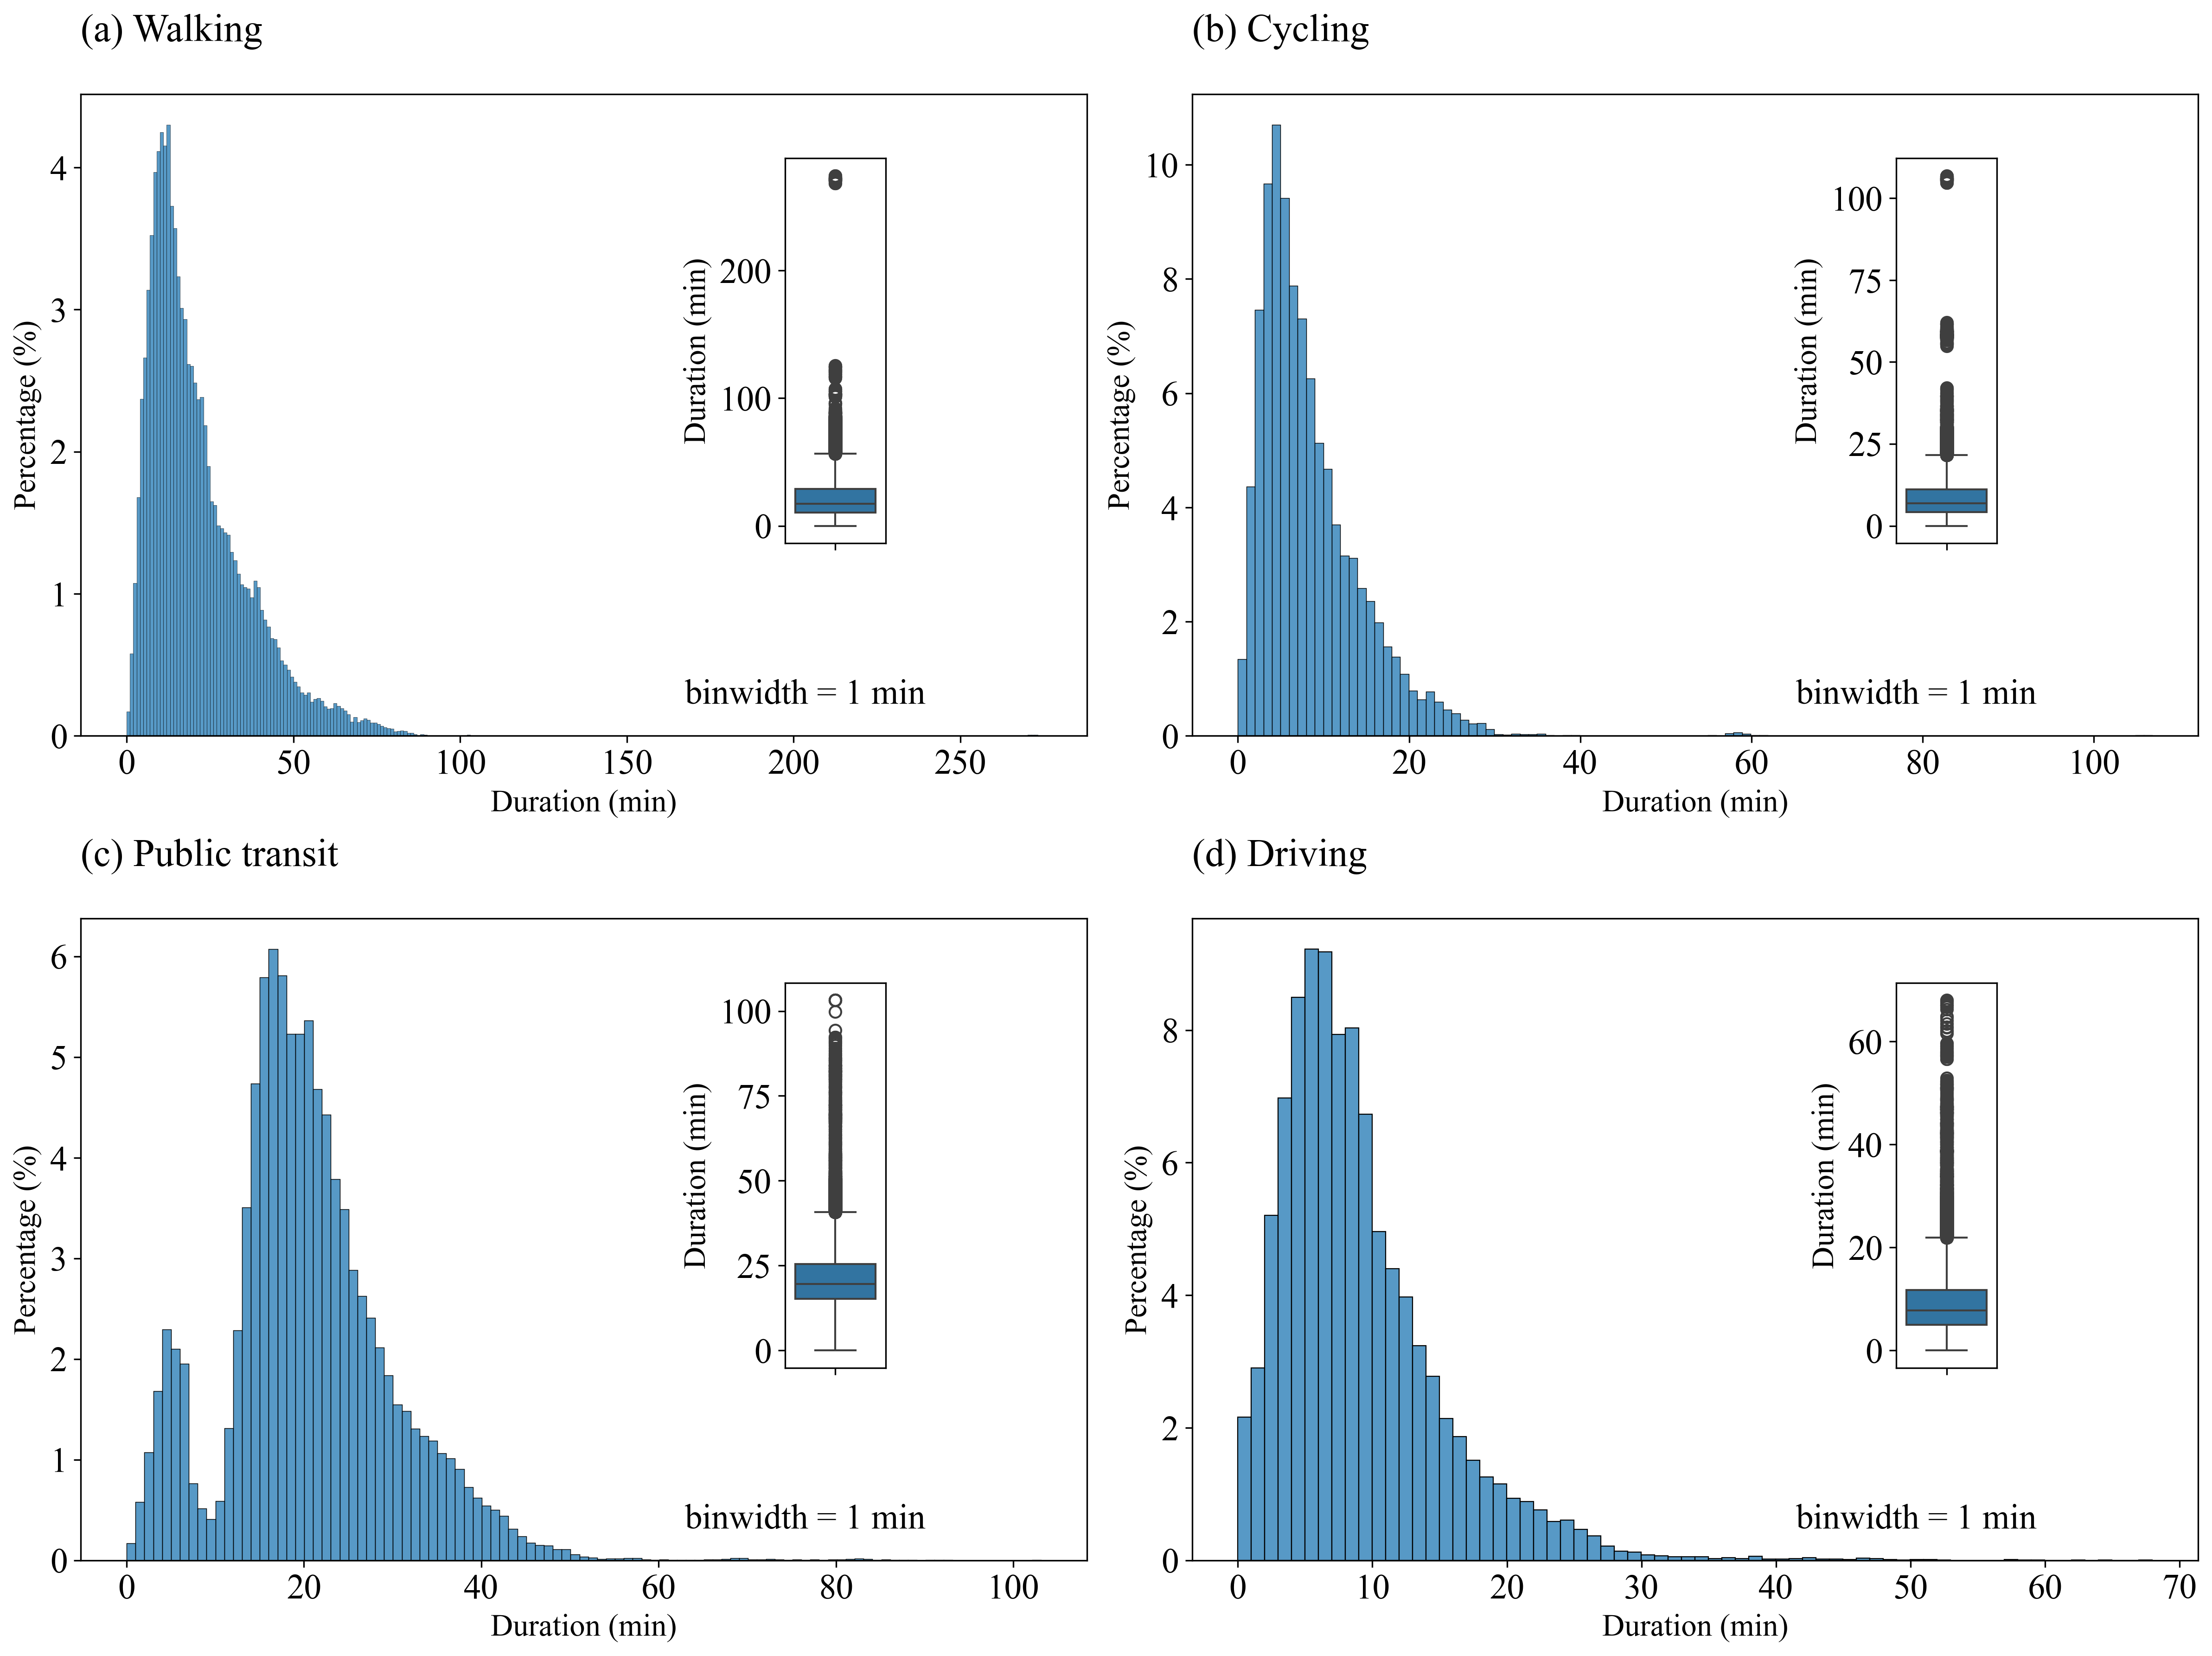

In [43]:
fig, ax = plt.subplots(2,2,figsize=(16,12), dpi=300)
ax = ax.flatten()

names = ['(a) Walking', '(b) Cycling', '(c) Public transit', '(d) Driving']
for i in range(len(ax)):
    sns.histplot(data=dt_lst[i],x='duration',binwidth=1, stat='percent', ax=ax[i])
    ax[i].set_xlabel('Duration (min)', fontsize=16)
    ax[i].set_ylabel('Percentage (%)', fontsize=16)
    ax[i].tick_params(axis='both', which='major', labelsize=18)
    ax02 = ax[i].inset_axes([0.7,0.3,0.1,0.6])
    sns.boxplot(dt_lst[i],y='duration',ax=ax02, orient=False)
    ax02.tick_params(axis='y', which='major', labelsize=18)
    ax02.set_ylabel('Duration (min)', fontsize=16)
    ax[i].set_title(f'{names[i]}\n', fontsize=20, loc='left')
    
    # if i==3:
    #     ax[i].xaxis.set_major_locator(plt.MultipleLocator(5))  # 这里设置间隔为0.2
    
    ax[i].text(0.6, 0.05, 'binwidth = 1 min', transform=ax[i].transAxes, fontsize=18)

plt.tight_layout()
plt.savefig(f'./result/png/data-descirbe/duration.png', dpi=300, bbox_inches='tight')

## distance

In [44]:
od_walk_nearest_parks.head(1)

,od_id,distance,duration,building_id,x_res,y_res,name,park_id,x_parks,y_parks
3466430,od_343455,1174,16.766667,b_0,118.729455,31.994567,河西中央公园,p_99,118.72059,31.997267


In [45]:
od_walk_nearest_parks['distance'].describe()

count    139409.000000
mean       1506.729831
std        1100.485851
min           0.000000
25%         729.000000
50%        1203.000000
75%        2023.000000
max       19194.000000
Name: distance, dtype: float64

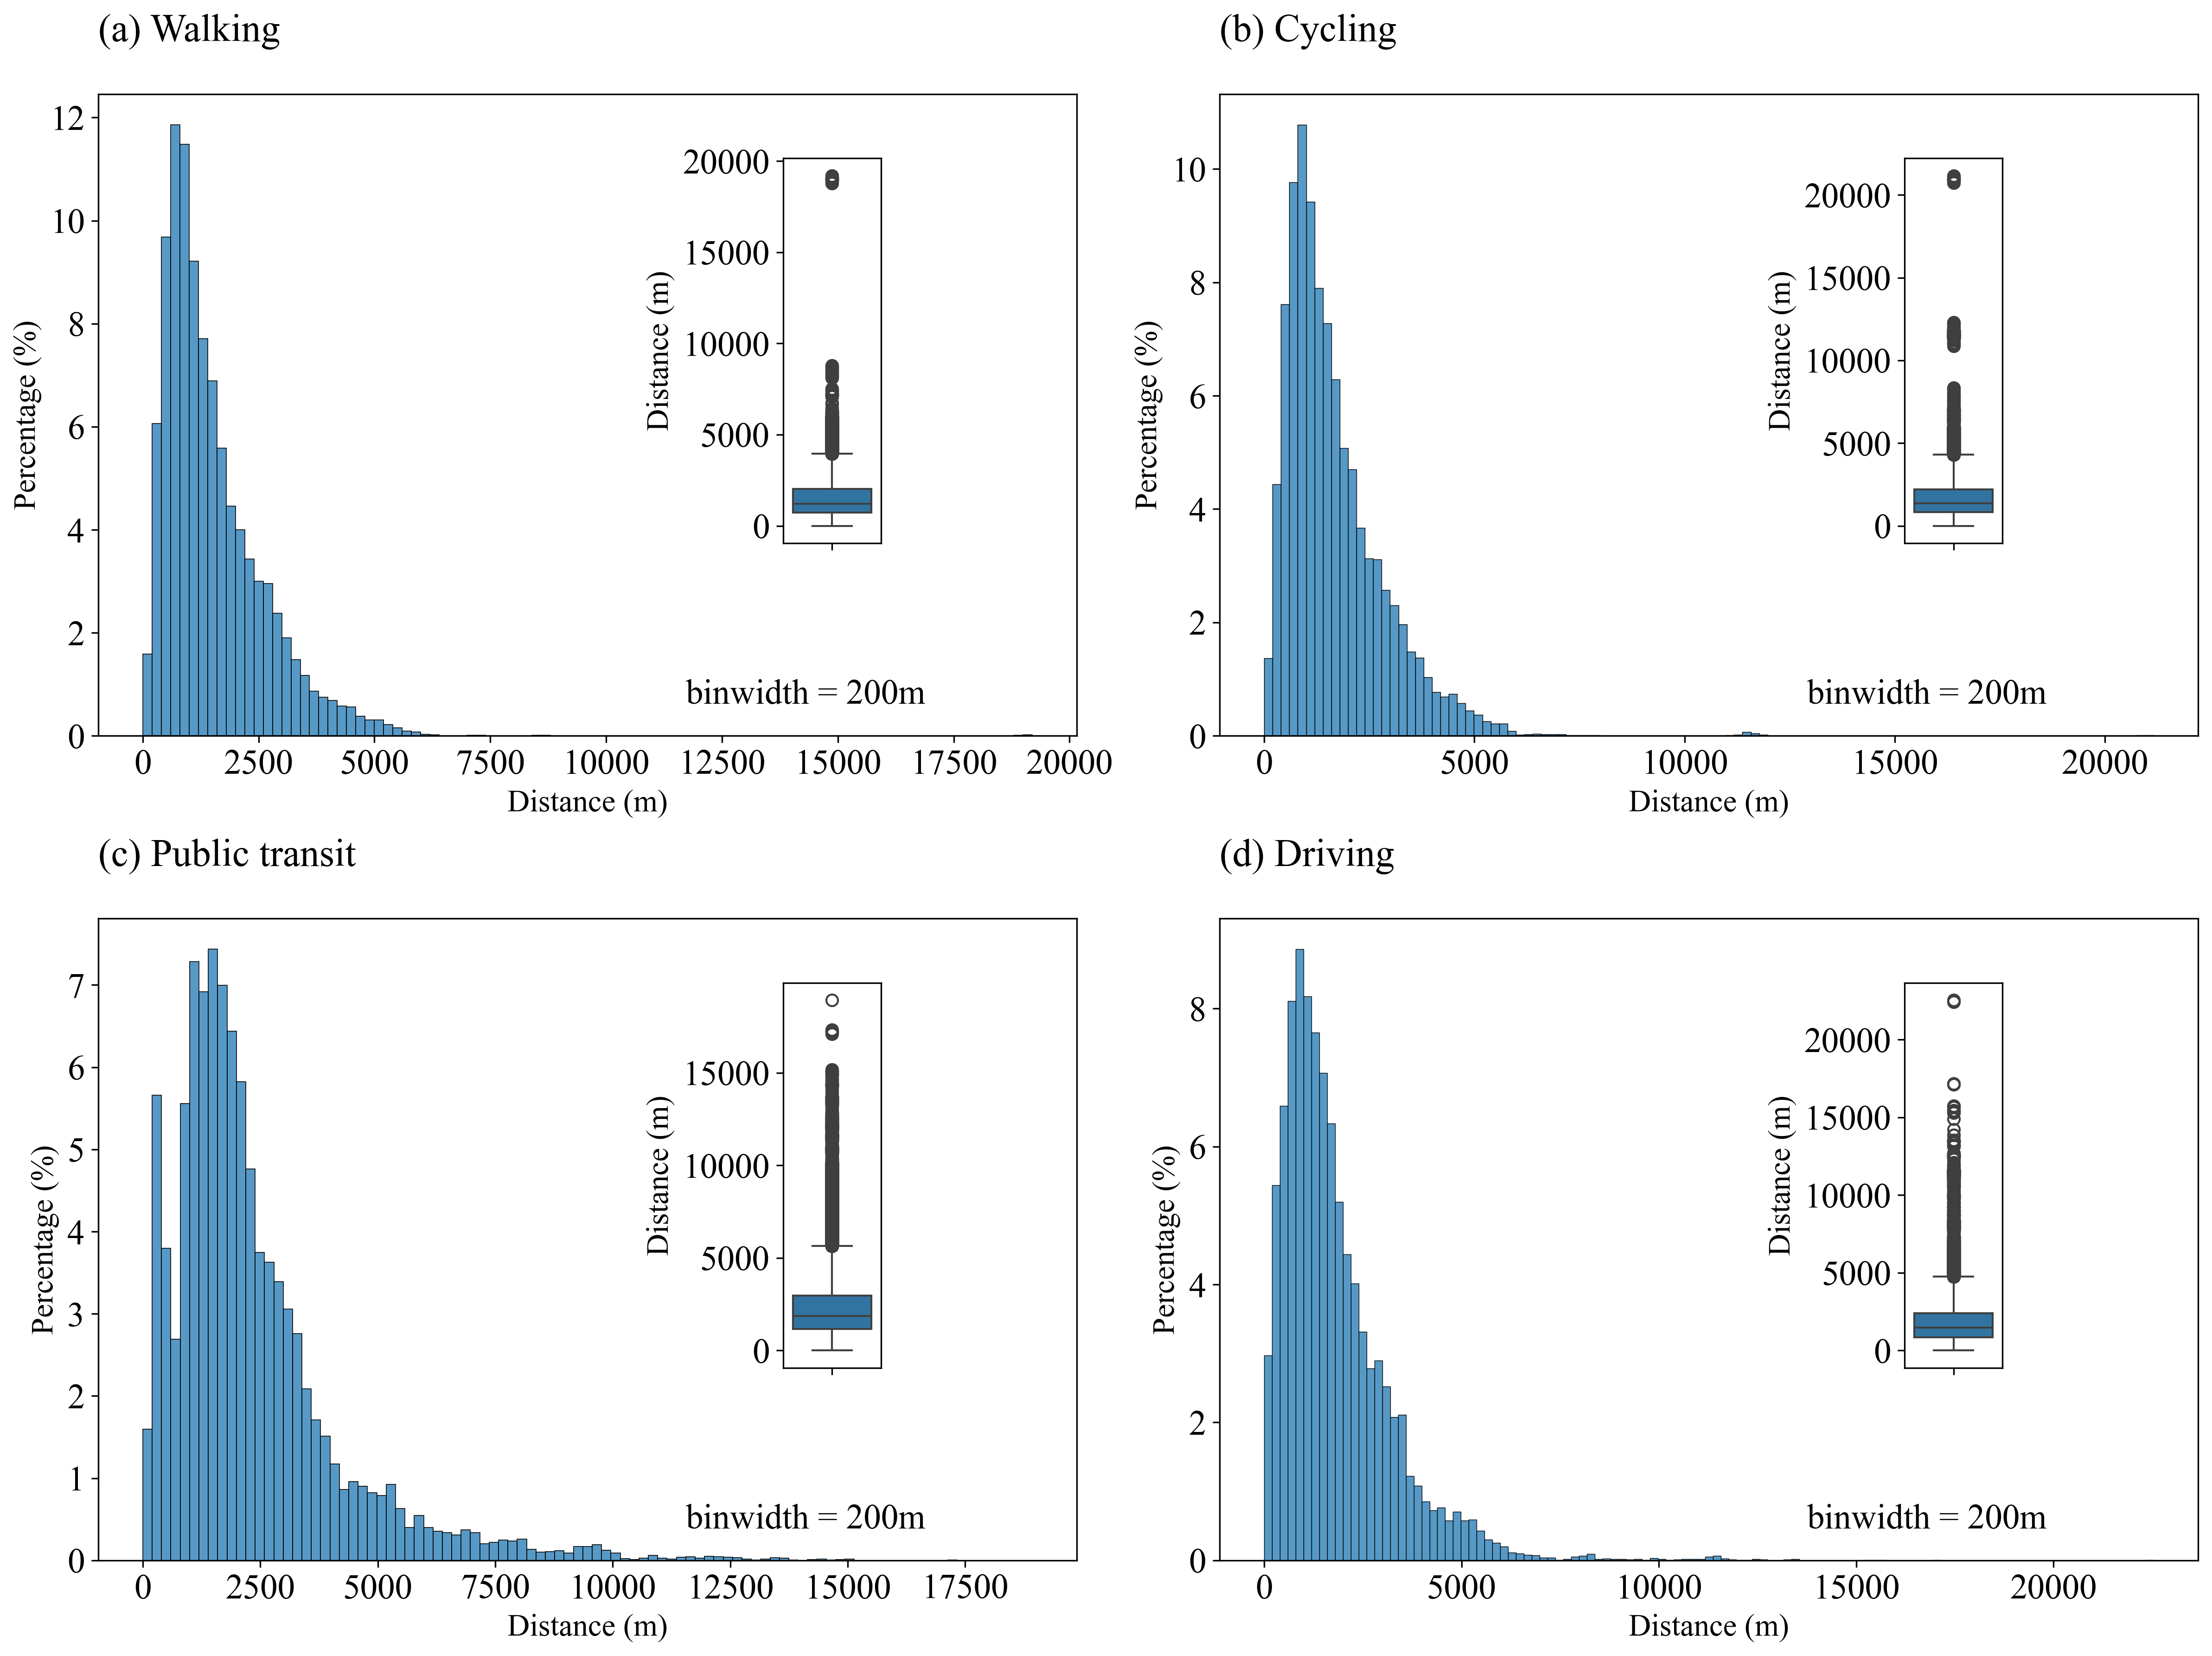

In [46]:
fig, ax = plt.subplots(2,2,figsize=(16,12), dpi=300)
ax = ax.flatten()

names = ['(a) Walking', '(b) Cycling', '(c) Public transit', '(d) Driving']
for i in range(len(ax)):
    label_x = 'distance'
    sns.histplot(data=dt_lst[i],x=label_x,binwidth=200, stat='percent', ax=ax[i])
    ax[i].set_xlabel('Distance (m)', fontsize=16)
    ax[i].set_ylabel('Percentage (%)', fontsize=16)
    ax[i].tick_params(axis='both', which='major', labelsize=18)
    ax02 = ax[i].inset_axes([0.7,0.3,0.1,0.6])
    sns.boxplot(dt_lst[i],y=label_x,ax=ax02, orient=False)
    ax02.tick_params(axis='y', which='major', labelsize=18)
    ax02.set_ylabel('Distance (m)', fontsize=16)
    ax[i].set_title(f'{names[i]}\n', fontsize=20, loc='left')
    
    ax[i].text(0.6, 0.05, 'binwidth = 200m', transform=ax[i].transAxes, fontsize=18)
    
plt.tight_layout()
plt.savefig(f'./result/png/data-descirbe/distance.png', dpi=300, bbox_inches='tight')